# Plotting Query Results

## Setup

In [12]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

In [14]:
# Import SQLAlchemy `automap` and other dependencies here
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func, inspect, MetaData, Table
Base = automap_base()

In [15]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)
inspector = inspect(engine)

## Explore Database

In [16]:
# Use the Inspector to explore the database and print the table names
inspector.get_table_names()

['emoji']

In [17]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [29]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
query = '''
SELECT *
FROM
emoji'''

emojidf = pd.read_sql(query, conn)
emojidf.head(10)

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
5,6,😊,1F60A,SMILING FACE WITH SMILING EYES,484540701
6,7,♻️,267B,BLACK UNIVERSAL RECYCLING SYMBOL,452489849
7,8,😒,1F612,UNAMUSED FACE,441690175
8,9,💕,1F495,TWO HEARTS,381679908
9,10,😘,1F618,FACE THROWING A KISS,377847645


## Reflect database and Query

In [32]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji
from sqlalchemy.orm import Session

In [33]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [34]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
query = '''
SELECT emoji_char, emoji_id, score
FROM
emoji'''

emojisdf = pd.read_sql(query, conn)
emojisdf

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
...,...,...,...
840,🛂,1F6C2,103654
841,🔠,1F520,103234
842,🔡,1F521,101160
843,🚱,1F6B1,92412


Unpack tuples using list comprehensions

In [39]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
emojiid = emojisdf['emoji_id'].tolist()
emojiid

emojiscores = emojisdf['score'].tolist()
emojiscores

[1814832150,
 840619939,
 680382416,
 652715459,
 515991922,
 484540701,
 452489849,
 441690175,
 381679908,
 377847645,
 343967555,
 333263710,
 311468371,
 283873968,
 275930731,
 268504794,
 225109999,
 210995480,
 186214004,
 180720579,
 175057316,
 170127733,
 166417040,
 160872106,
 160434523,
 159984970,
 156664610,
 154175844,
 152572644,
 148162690,
 143975239,
 139984564,
 139339131,
 137264417,
 134780880,
 130865258,
 130477038,
 130424962,
 128234168,
 117379741,
 116339825,
 114838048,
 112633851,
 108324223,
 106264072,
 102799918,
 101184223,
 100755958,
 100292305,
 100157815,
 98235735,
 89030704,
 87426008,
 87163250,
 86580161,
 85658369,
 85312719,
 82829646,
 79126643,
 78680533,
 77765674,
 74343725,
 73032826,
 72768872,
 70983935,
 70255616,
 69816777,
 69065216,
 68397410,
 67612477,
 67066945,
 65760360,
 65256066,
 63920738,
 60958875,
 59951054,
 59648875,
 59562452,
 59391321,
 59228054,
 56117603,
 55226491,
 53880740,
 52440798,
 52172894,
 51288550,
 50

## Plot using Matplotlib

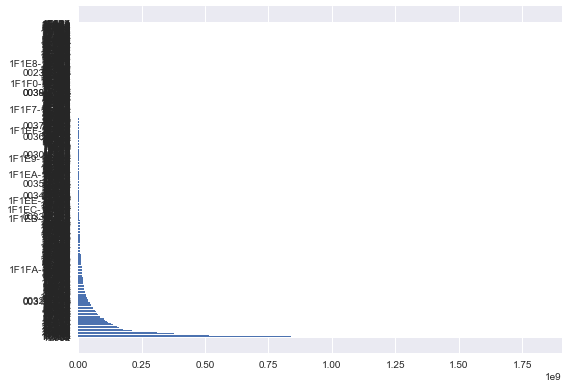

In [47]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
#emojiscores = emojiscores.sort_values(ascending=False)
plt.barh(emojiid,emojiscores)
plt.tight_layout()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [50]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
query = '''
SELECT emoji_id, score
FROM
emoji'''

emojidf = pd.read_sql(query, conn)
emojidf= emojidf.set_index('emoji_id')
emojidf

,score
emoji_id,
1F602,1814832150
2764,840619939
1F60D,680382416
2665,652715459
1F62D,515991922
...,...
1F6C2,103654
1F520,103234
1F521,101160


Plot using Pandas

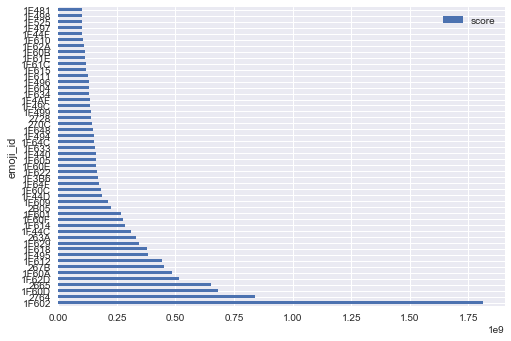

In [54]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
emojidf = emojidf.head(50)
emojidf.plot(kind='barh')

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE